### 5  Comparison to Zekollari et al.  in review

In [21]:
import pandas as pd
import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
fs = 22

def plotlabel(xvar, yvar, label, ax=None):
    ax.text(xvar-1, yvar+0.8, label, alpha=0.7, fontsize=fs)

In [22]:
df = pd.read_csv(f'3_shift_summary_region_characteristicsFeb12_2024.csv', index_col=[0])
vol_2020_hugo_fari = np.concatenate([df['regional_volume_m3_2020_via_5yravg'][1:].values, np.array([df['regional_volume_m3_2020_via_5yravg'][0]])])

In [23]:
pd_l = pd.read_csv('lowess_fits/fitted_lowess_best_frac_shift_years_rel_2020_101yr_avg_period_lowess_added_quantiles_added_current12deg_5000_Feb12_2024_ipcc_ar6.csv',
                          index_col=[0])
pd_l = pd_l.loc[pd_l.y.isna()]



In [24]:
divide_hugo_fari = False

In [25]:
ds_zekollari = xr.open_dataset('data/data_from_others/zekollari_et_al_2024_glambie_selection.nc')
pd_zekollari_h_f = (100 * ds_zekollari.volume_m3.sel(year=2100)/vol_2020_hugo_fari.reshape(1,1,20,1)).to_dataframe().reset_index()
pd_zekollari_z = (100*ds_zekollari.volume_m3.sel(year=2100)/ds_zekollari.volume_m3.sel(year=2020)).to_dataframe().reset_index()

if divide_hugo_fari:
    pd_zekollari = pd_zekollari_h_f
else:
    pd_zekollari = pd_zekollari_z
pd_zekollari['gcm_scenario'] = pd_zekollari['gcm'] + '_' + pd_zekollari['scenario']
pd_zekollari = pd_zekollari.set_index('gcm_scenario')
pd_zekollari =  pd_zekollari.rename(columns = {'volume_m3':'volume_2100_rel_2020_%'})
pd_temp_ch_cmip6 = pd.read_csv('/home/www/oggm/oggm-standard-projections/analysis_notebooks/Global_mean_temp_deviation_2071_2100_2081_2100_2271_2300_2281_2300_rel_1850_1900_cmip6_gcms_ipcc_ar6_def.csv',
                               index_col=[0])



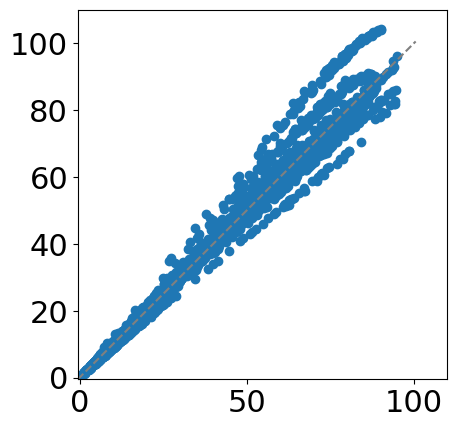

In [26]:
plt.plot(pd_zekollari_z['volume_m3'], pd_zekollari_h_f['volume_m3'] , 'o')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.set_ylim([-0.5,110])
ax.set_xlim([-0.5,110])

ax.plot([-0.5,100.5],[-0.5,100.5],'--',color='grey')

17
2               0.5  mass_loss_rel_2020_%  zekollari_mass_loss_rel_2020_%  reg
region                                                                      
All     36.260625             63.739375                       26.477094  All
01      41.806220             58.193780                       45.373441   01
02       6.396072             93.603928                       82.220862   02
03      53.323695             46.676305                       14.320640   03
04       5.178875             94.821125                       41.129146   04
05      32.339278             67.660722                       32.221758   05
06      23.569014             76.430986                       33.928006   06
07      17.800476             82.199524                       28.856566   07
08       0.395813             99.604187                       68.658279   08
09      11.930371             88.069629                       21.504169   09
10      13.765190             86.234810                       78.225144

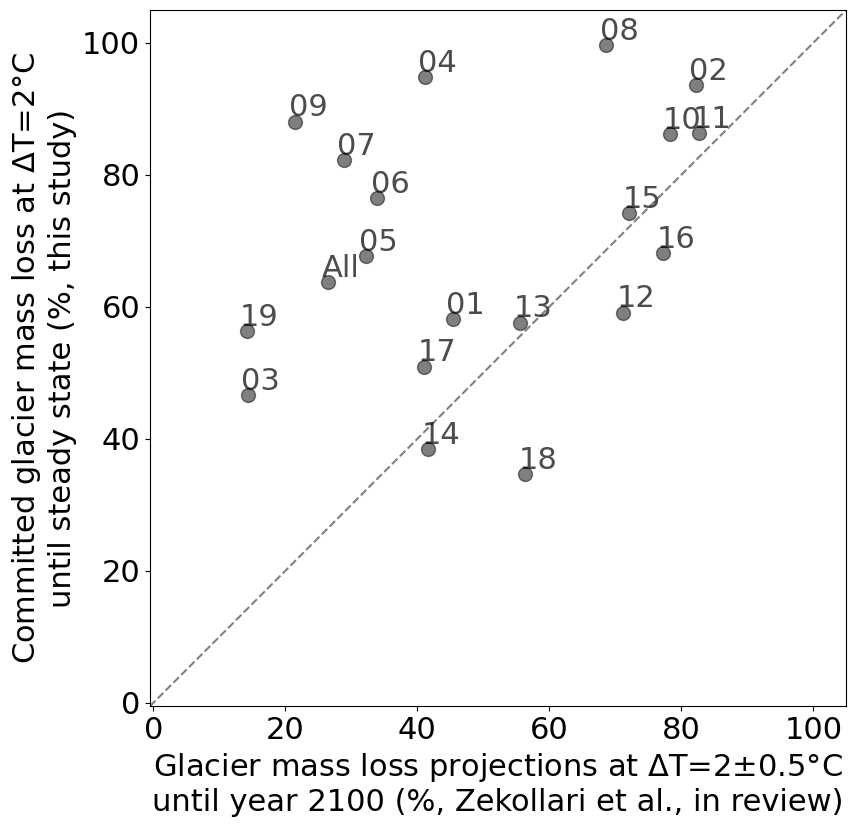

In [31]:
# glacier mass loss in GMIP3
plt.rc('font', size=22)  


fig, axs = plt.subplots(1,1, figsize=(9,9))
axs = [axs]
for j,temp in enumerate([2]): #,3]): 
    pd_gmip3_lowess_aroundtemp = pd_l.loc[temp][['0.5', 'region']]
    pd_gmip3_lowess_aroundtemp = pd_gmip3_lowess_aroundtemp.set_index('region')
    pd_gmip3_lowess_aroundtemp['mass_loss_rel_2020_%'] = 100 - pd_gmip3_lowess_aroundtemp['0.5']

    exp_around_temp = pd_temp_ch_cmip6.loc[(pd_temp_ch_cmip6['global_temp_ch_2071-2100_preindustrial'] > temp-0.5) & (pd_temp_ch_cmip6['global_temp_ch_2071-2100_preindustrial'] <temp+0.5)]
    common_exps = []
    for e in exp_around_temp.index.values:
        if e in pd_zekollari.index:
            common_exps.append(e)
    print(len(common_exps))
    
    pd_zekollari_around_temp = pd_zekollari.loc[common_exps].copy()

    pd_zekollari_around_temp['mass_loss_rel_2020_%'] = 100 - pd_zekollari_around_temp['volume_2100_rel_2020_%']
    pd_zekollari_around_temp_med = pd_zekollari_around_temp.groupby(['region']).median().reset_index()    # model
    pd_zekollari_around_temp_med = pd_zekollari_around_temp_med.set_index('region')
    

    ### now the plot
    reg_l = []
    for r in pd_gmip3_lowess_aroundtemp.index:
        if r == 'All':
            reg = 'global'
        else:
            reg = f'RGI{r}'
        reg_l.append(reg)

    pd_gmip3_lowess_aroundtemp['zekollari_mass_loss_rel_2020_%'] = pd_zekollari_around_temp_med.loc[reg_l]['mass_loss_rel_2020_%'].values
    pd_gmip3_lowess_aroundtemp['reg'] = pd_gmip3_lowess_aroundtemp.index

    ax = axs[j]

    ax.plot(pd_gmip3_lowess_aroundtemp['zekollari_mass_loss_rel_2020_%'], 
             pd_gmip3_lowess_aroundtemp['mass_loss_rel_2020_%'],
             'o', ms=10, color='black', alpha = 0.5)

    xx = 'zekollari_mass_loss_rel_2020_%'
    yy = 'mass_loss_rel_2020_%'
    pd_gmip3_lowess_aroundtemp.apply(lambda x: plotlabel(x[xx],x[yy], x.reg, ax=ax), axis=1)
    # .drop(['19','17','18','15','13'])


    ax.set_aspect('equal', adjustable='box')
    ax.plot([-0.5,105.5],[-0.5,105.5],'--',color='grey')

    ax.set_ylim([-0.5,105])
    ax.set_xlim([-0.5,105])

    ax.set_xlabel(r'Glacier mass loss projections at $\Delta$T=2$\pm$0.5°C' + f'\nuntil year 2100 (%, Zekollari et al., in review)')
                  # Zekollari et al. in review (median over\n{len(common_exps)} experiments at {temp}+/-0.5°C with each 3 glacier models)')
   # ax.set_ylabel(f'This study (GMIP3 median, LOWESS fit at {temp}°C)')
    ax.set_ylabel(r'Committed glacier mass loss at $\Delta$T=2°C'+f'\nuntil steady state (%, this study)')


    
    #ax.set_title(f'Glacier mass loss (rel. to 2020, %) at ΔT = {temp}°C')
    print(temp, pd_gmip3_lowess_aroundtemp)
if divide_hugo_fari:
    plt.suptitle('common 2020 estimate used to get to relative estimates (here from Hugonnet/Farinotti)')
plt.tight_layout()
plt.savefig('figures/fig_ED6.png')

- in GMIP3: relative to 2020 means dividing through the glacier volume at year 2020 (estimated by Hugonnet and Farinotti)
- in Zekollari et al. dataset : relative to 2020 estimated by dividing by each individual projection in year 2020 
--> (this is likely quite different in some regions at least?)

In [13]:
# used GMT experiments of the Zekollari et al data set
exp_around_two.loc[common_exps]['global_temp_ch_2071-2100_preindustrial']

NameError: name 'exp_around_two' is not defined